# VQE Example

Here we present a very simple example of VQE using qiskit.

We use the Hamiltonian: $$ H = \sigma^z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

For optimization, we present a very naive brute force method. We will graph all possible values in an interval given a step size, and then use np.amin() to find the minimum value.


In [40]:
import numpy as np
import math as m
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
import matplotlib.pyplot as plt
#from qiskit_textbook.tools import random_state, array_to_latex # This import isn't working for me

import qiskit
print(qiskit.__qiskit_version__) # I add this so we know what versions are being used

{'qiskit-terra': '0.14.1', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.0', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.1', 'qiskit': '0.19.3'}


In [54]:
H = np.array([[1,0],[0,-1]]) # our Hamiltonian is just the sigma^z matrix.
# It seems like they never actually use H, even though they program it in?

def ansatz(param, qc): 
    # This is applied in expectation, and it is assumed to be applied on a |0> qubit
    # Sets theta = param, and the next two to 0. Last argument is the qubit number
    qc.u3(param, 0, 0, 0) 
    
    return


def expectation(param, shots_number = 1024):
    # first, we run the quantum circuit
    # Then, using the resulting measurement, we use the numbers to calculate the expectation value
    # This function is hard-coded for a specific H. (I may change this later)
    # Since H = sigma^z, let's assume that we are in the z-basis. Then, we need only find the amplitudes of being 
    # in |0> and |1>. 
    # <H> = (Counts(0) - Counts(1)) / Normalization
    
    # Creating the circuit
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    qc = QuantumCircuit(q, c)
    
    ansatz(param, qc) # Applying the ansatz preparation on a given |0>
    qc.measure(0,0) # measures onto the classical registry
    
    # print(qc.draw()) # prints a drawing of the circuit
    
    backend = BasicAer.get_backend('qasm_simulator')
    counts = execute(qc, backend, shots=shots_number).result().get_counts() # executs the job
    #plot_histogram(counts) # This would show the plot
    
    
    # I use if/else statements to avoid key errors if we are 100% in one state.
    if ('0' in counts.keys()):
        freq_0 = counts['0'] / shots_number
    else:
        freq_0 = 0
        
    if ('1' in counts.keys()):
        freq_1 = counts['1'] / shots_number
    else:
        freq_1 = 0
    
    #print(freq_0)
    #print(freq_1)
    
    exp = freq_0 - freq_1 # This can be seen from <psi | H | psi>
    
    return exp

def grid_search():
    # Grid search is just one of many optimization functions we can use. 
    return

def brute_force(step_size, min_theta, max_theta):
    # This is an extremely naive optimization method, but I am using it return a graph
    # We will pick a step size, start at min_theta, and work all the way to the max_theta.
    # This really only works because our ansatz is a one-parameter wave function
    
    thetas = np.arange(min_theta, max_theta, step_size)
    expectations = np.zeros(np.size(thetas)) # creating a zero array of equal length
    
    i = 0 
    while i < np.size(thetas):
        expectations[i] = expectation(thetas[i])
        i += 1
        

    plt.scatter(thetas, expectations)
    min_value = np.amin(expectations)
    min_index = np.where(expectations == min_value)[0][0] # returns the index of the first instance of the minimum value
    opt_theta = thetas[min_index]
    
    print("The minimum expectation value is " + str(min_value) + ", which occurs at position "
          + str(min_index) + " and corresponds to theta = " + str(opt_theta))
    return opt_theta, min_value
    
    

The minimum expectation value is -1.0, which occurs at position 10 and corresponds to theta = 3.141592653589793


(3.141592653589793, -1.0)

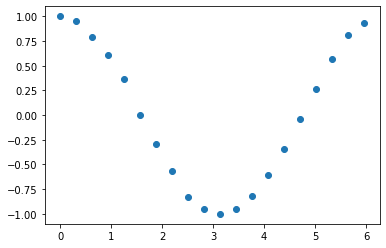

In [55]:
brute_force(m.pi/10, 0.0, 2*m.pi)

# NOTES

one issue concerned circuit copies. in Brute force, we call expectation and make a new qc every time, so theres no need